In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import missingno as msno
import seaborn as sns
from tqdm.notebook import tqdm
from pycaret.classification import *
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False
from tqdm.notebook import tqdm

In [2]:
card_df = pd.read_csv('creditcard.csv')

In [3]:
card_df[card_df['Class']==1]['Class'].value_counts()

1    492
Name: Class, dtype: int64

<AxesSubplot:>

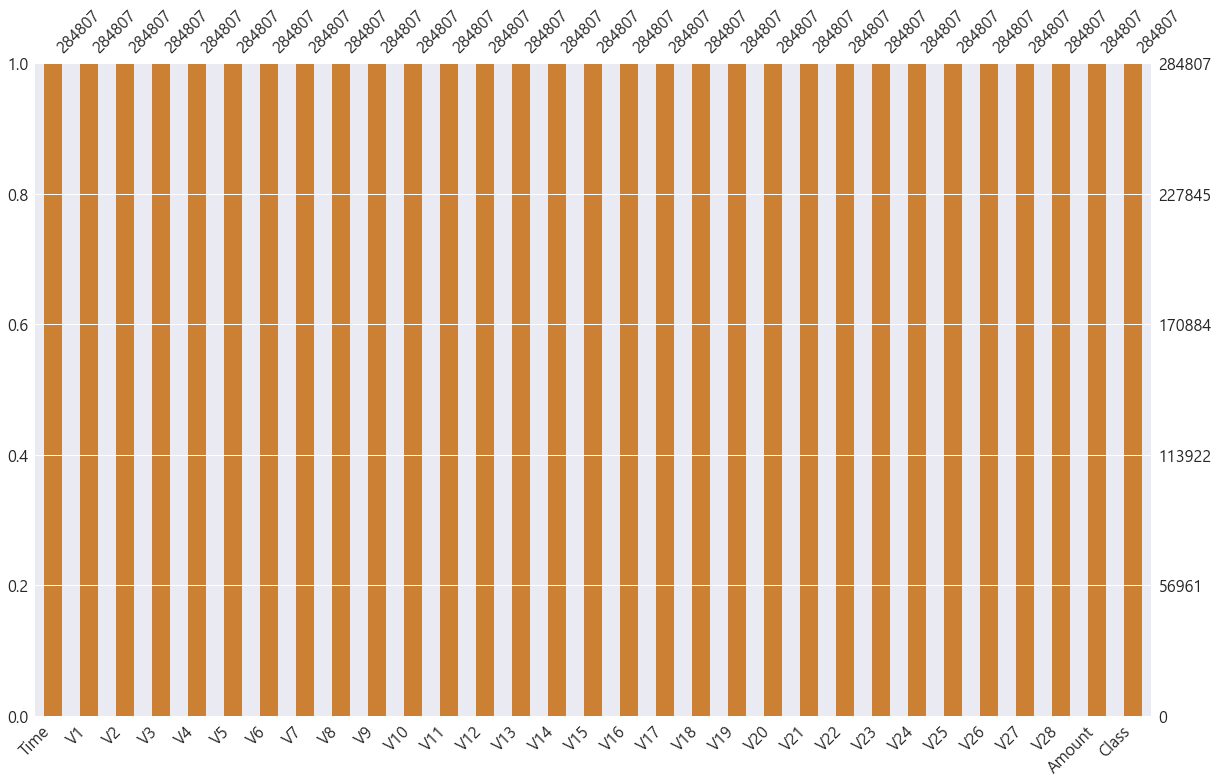

In [4]:
msno.bar(df=card_df,figsize=(20,12),color=(0.8,0.5,0.2))

In [5]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

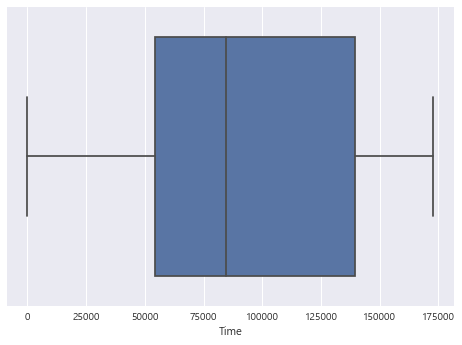

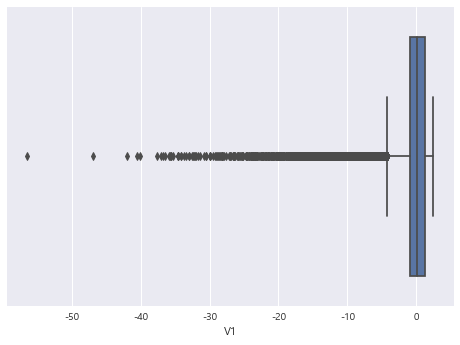

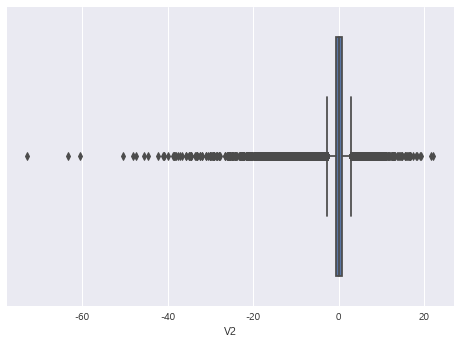

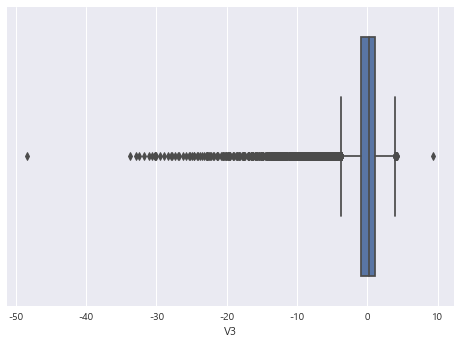

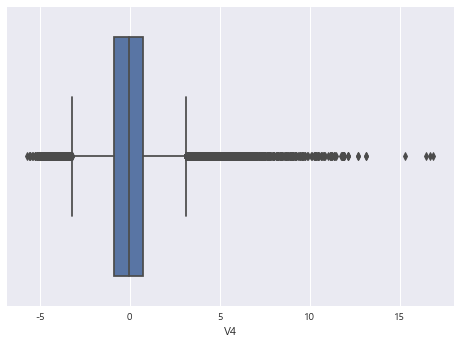

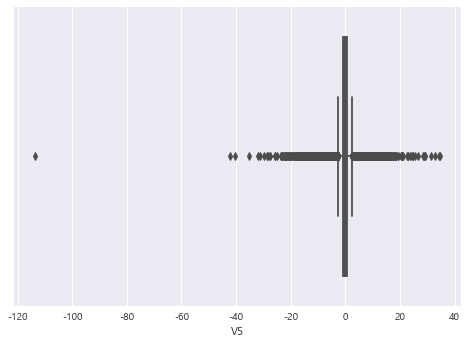

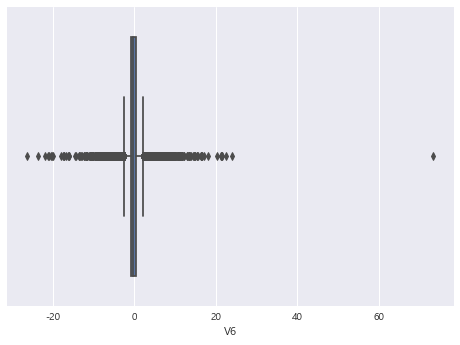

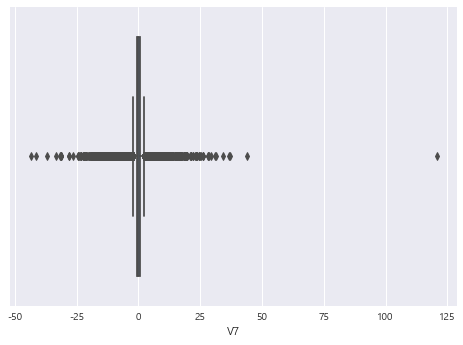

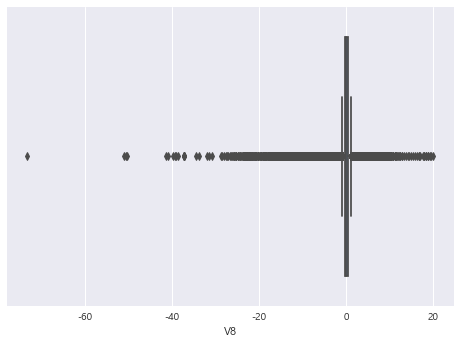

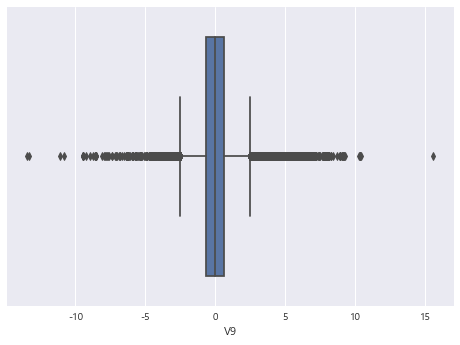

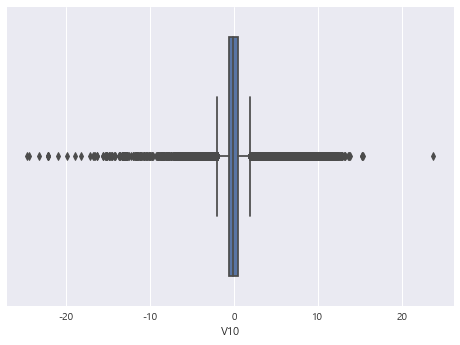

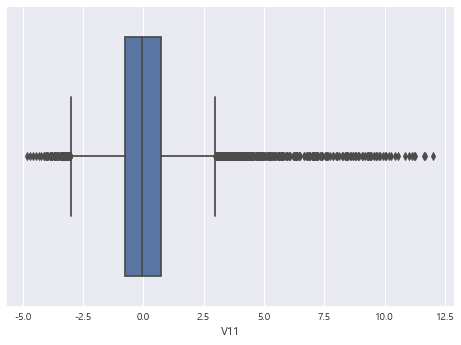

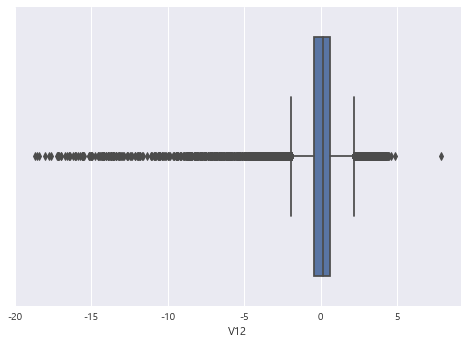

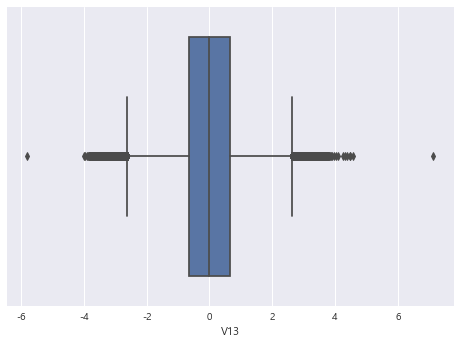

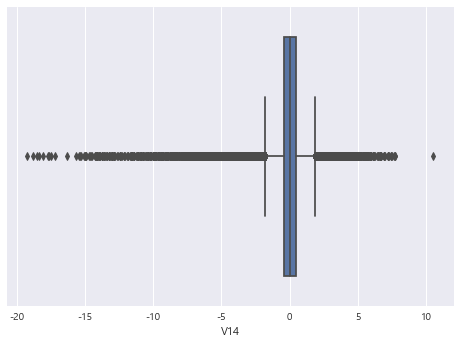

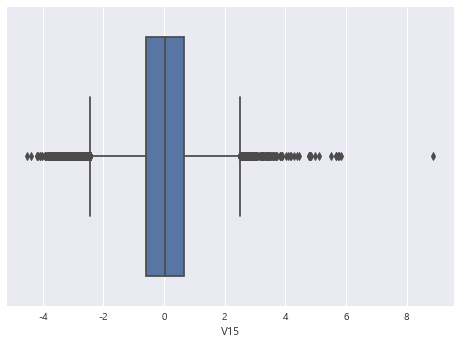

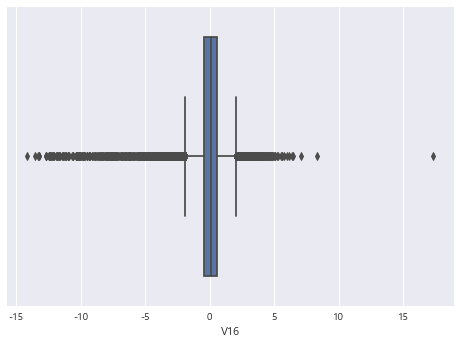

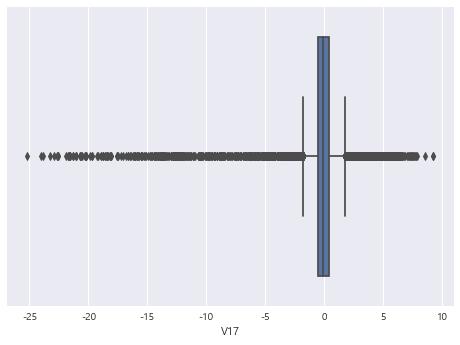

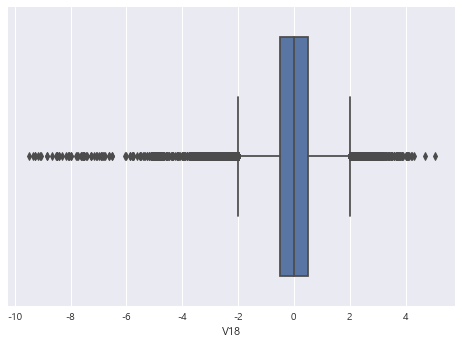

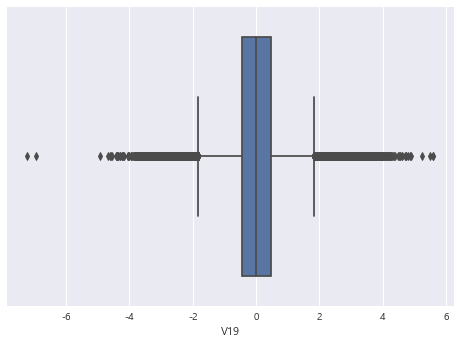

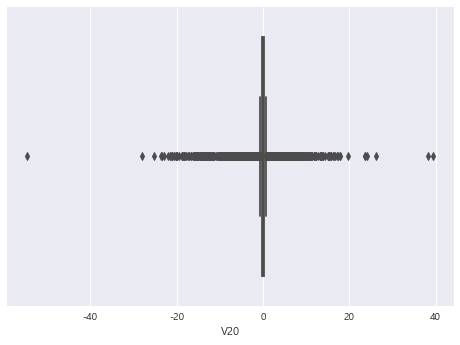

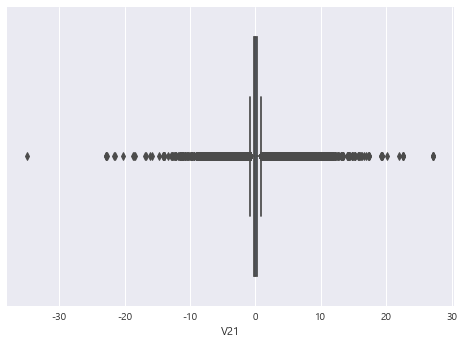

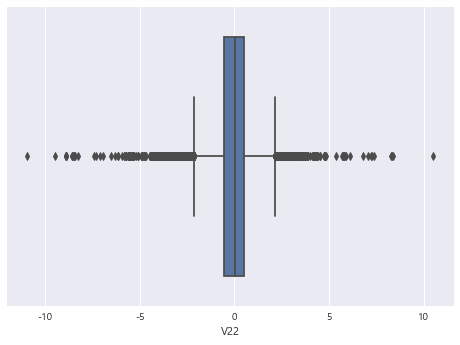

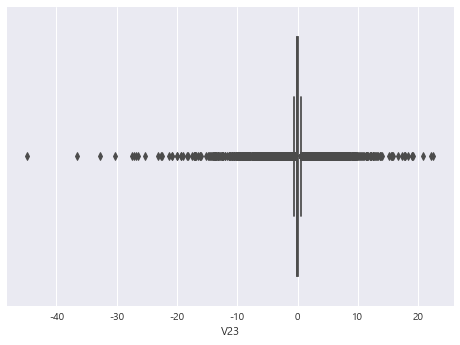

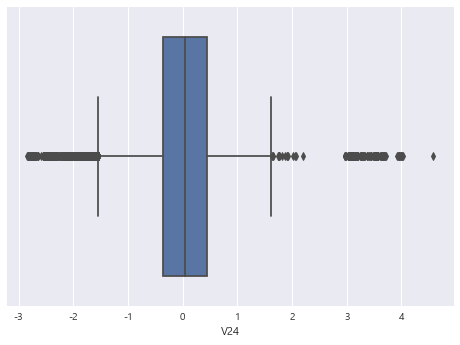

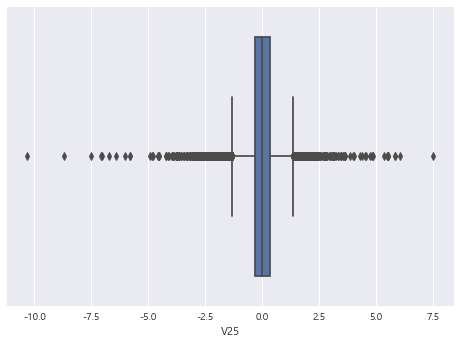

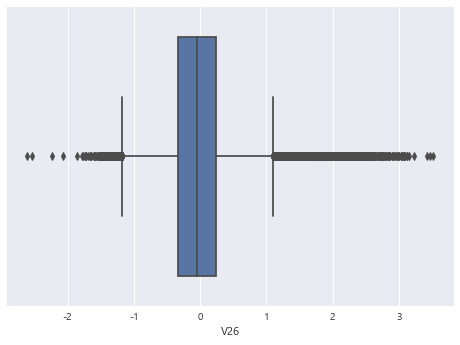

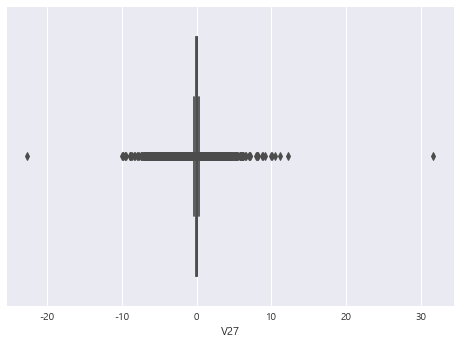

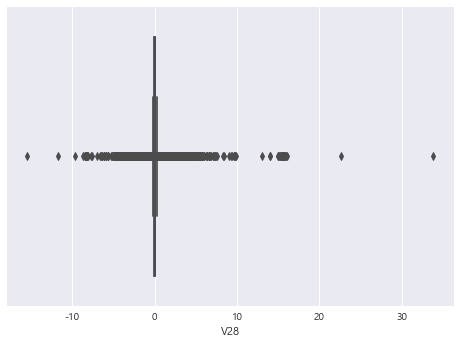

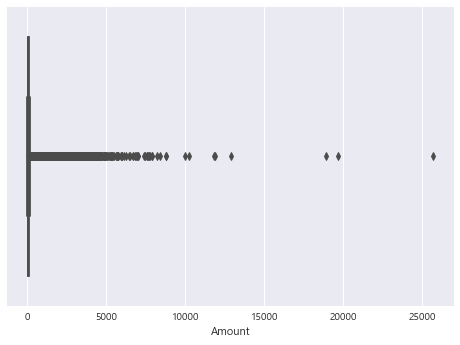

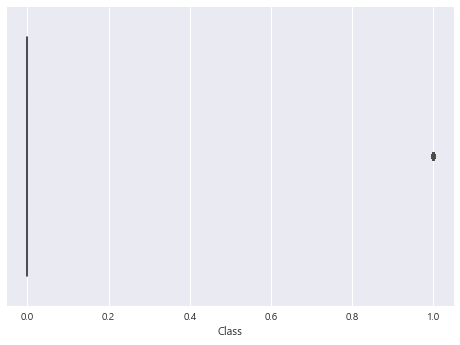

In [6]:
for i in range(len(card_df.columns)):
    sns.boxplot(card_df.iloc[:,i])
    plt.show()

In [7]:
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


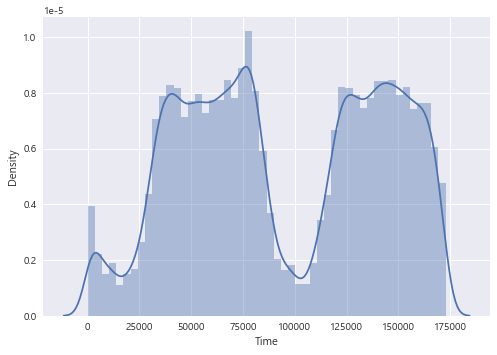

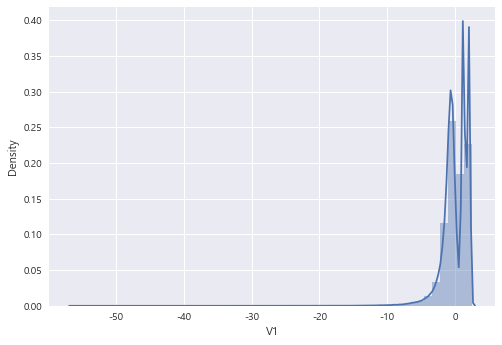

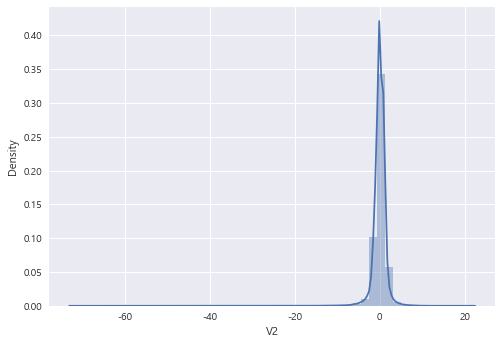

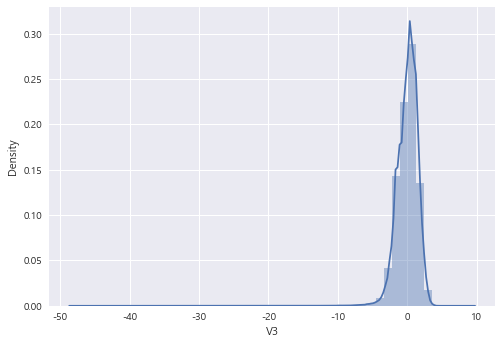

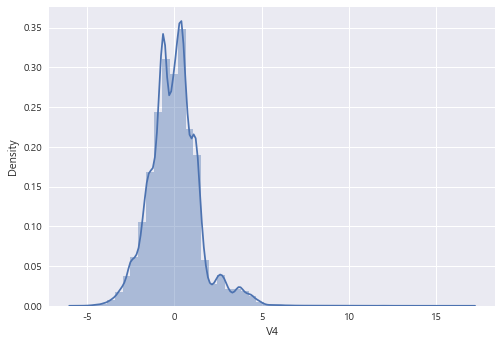

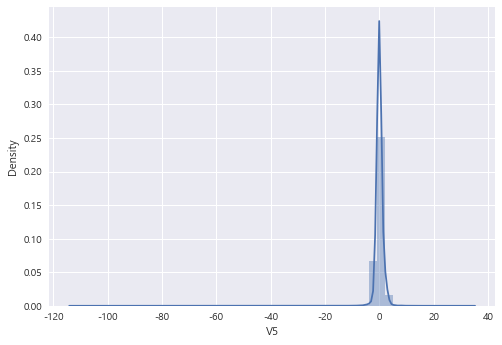

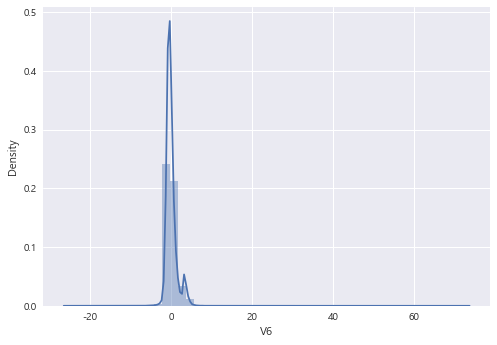

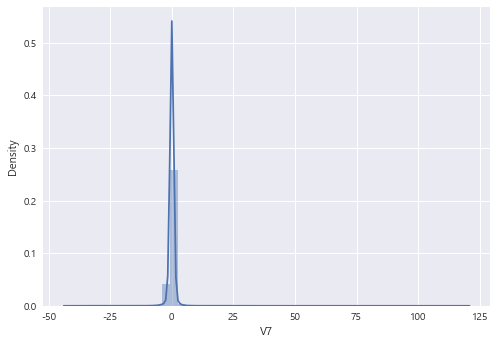

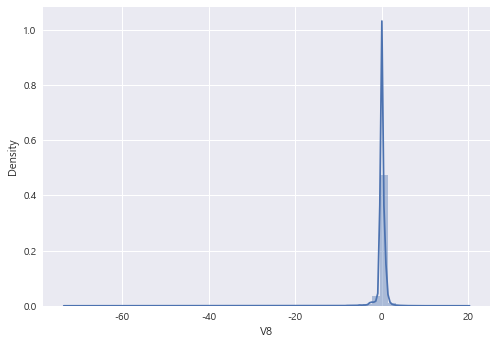

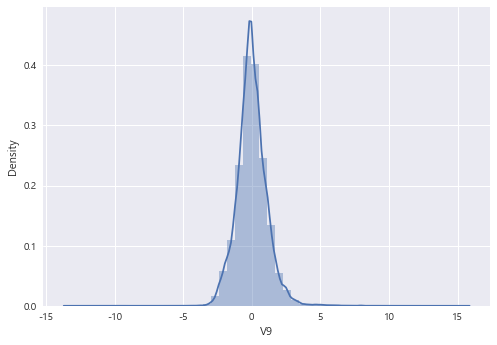

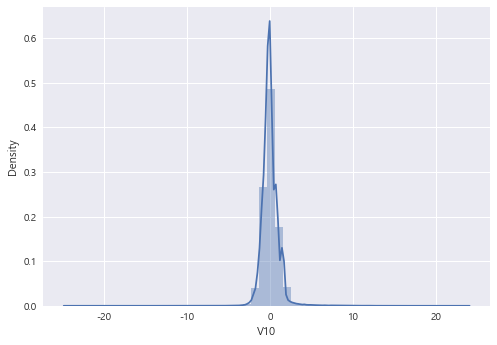

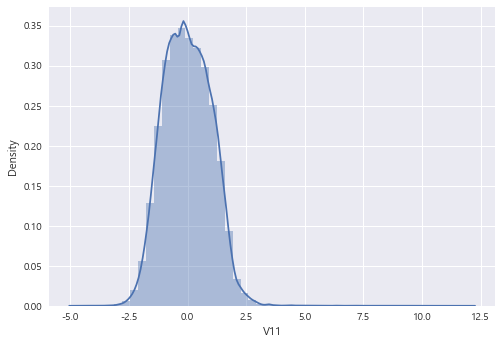

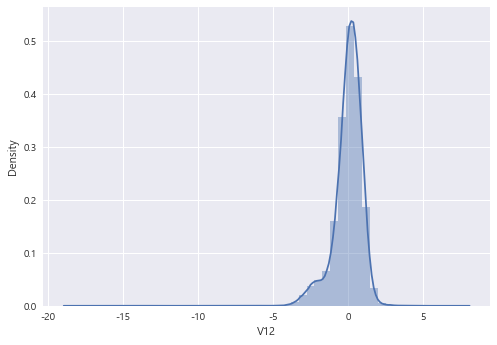

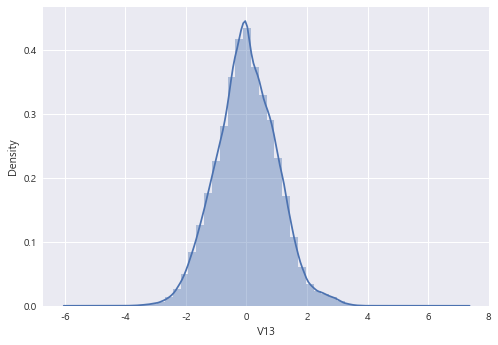

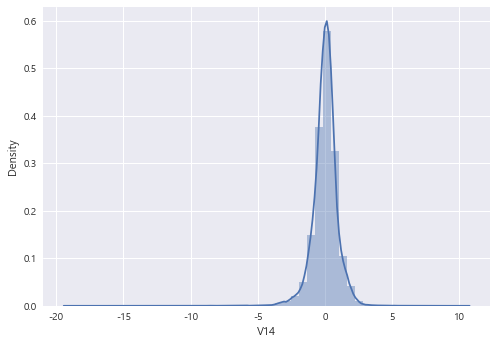

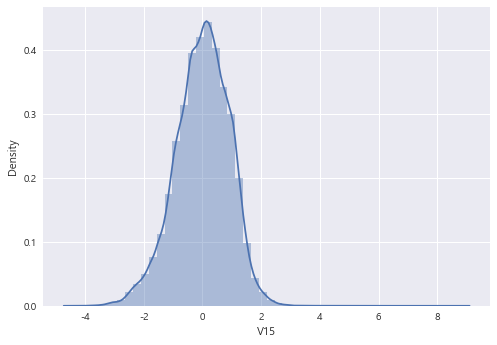

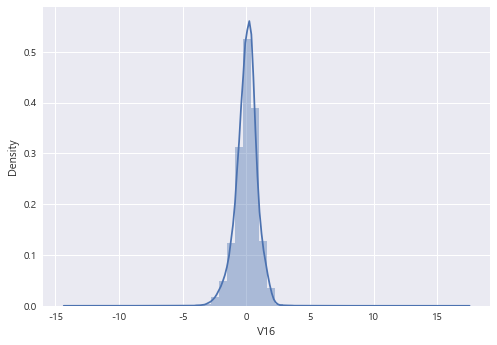

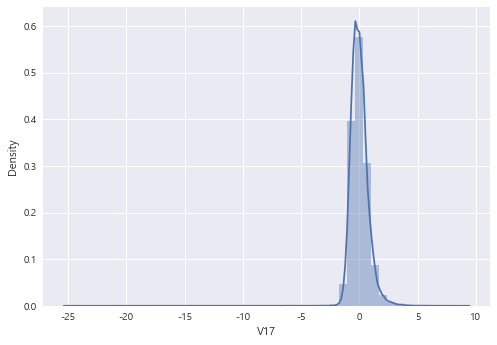

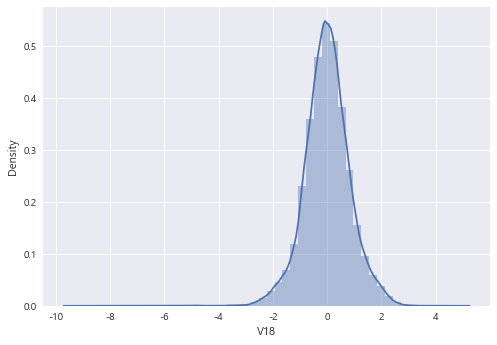

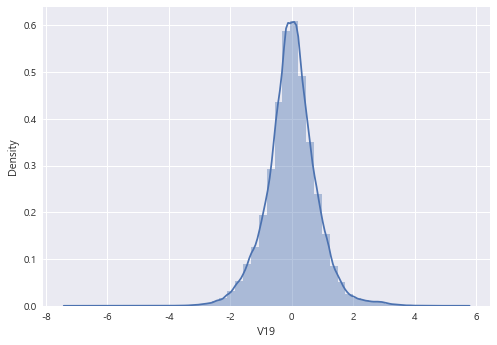

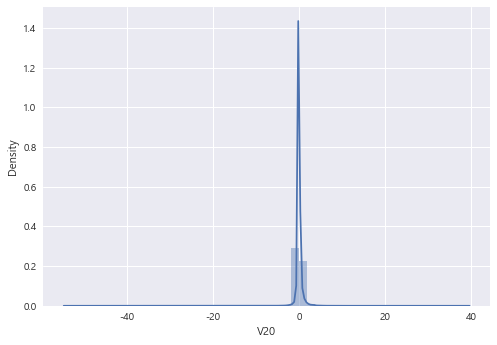

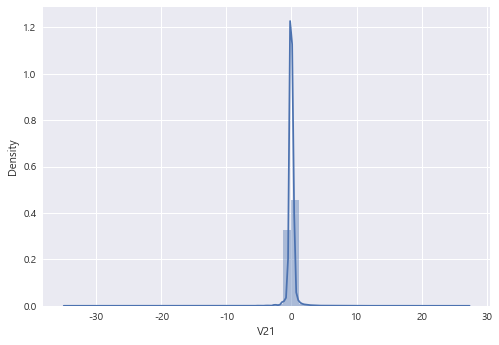

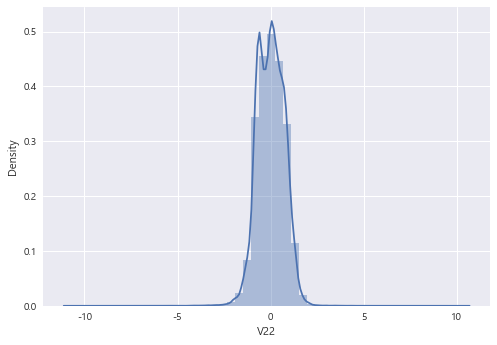

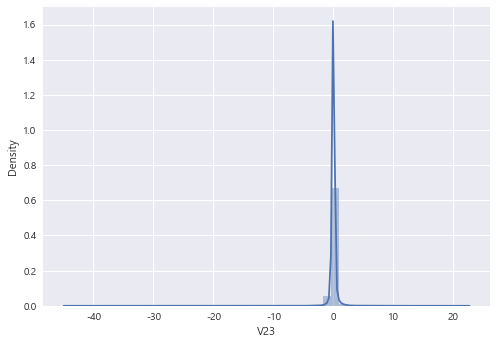

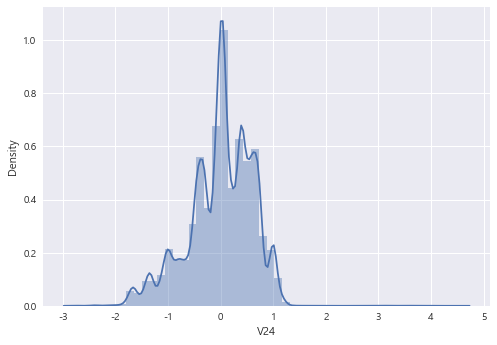

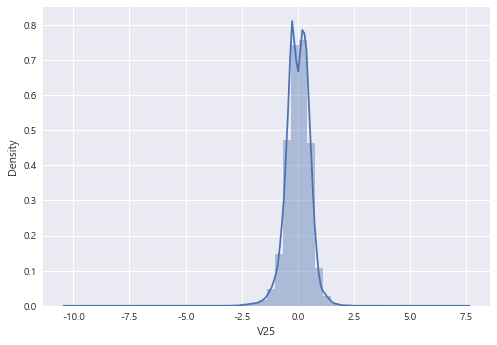

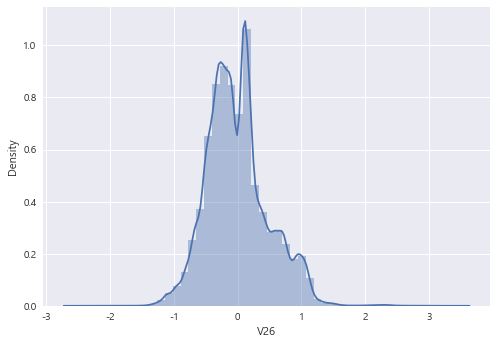

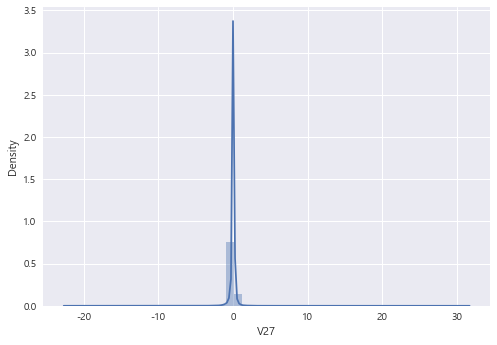

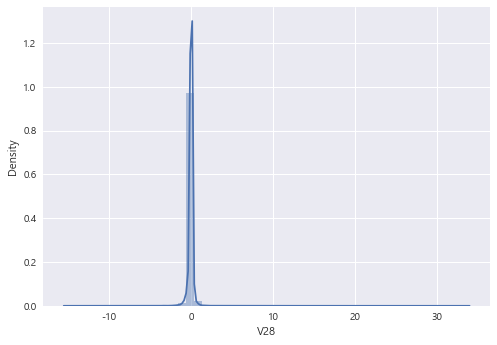

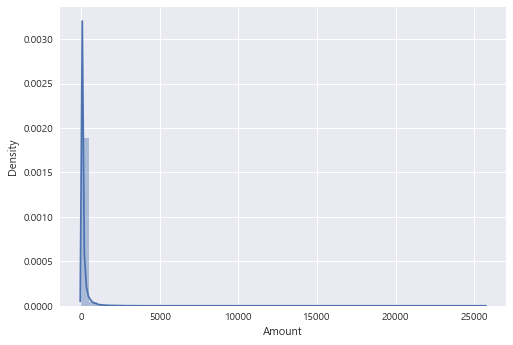

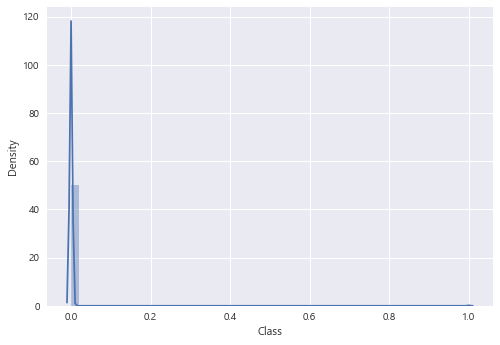

In [8]:
for i in range(len(card_df.columns)):
    sns.distplot(card_df.iloc[:,i])
    plt.show()

In [9]:
card_df.corrwith(card_df["Class"]).sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
dtype: float64

Text(0.5, 1.0, 'Heat map of the feature variables')

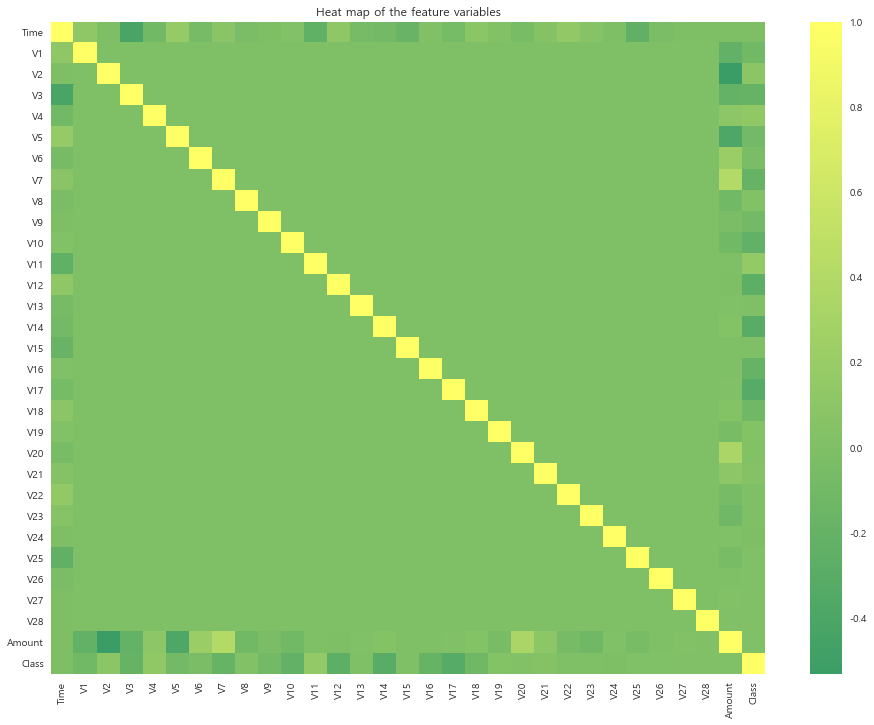

In [10]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(card_df.corr(), center = 0, cmap = 'summer')
ax.set_title('Heat map of the feature variables')

In [11]:
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [12]:
card_df_columns = list(card_df.columns)

In [13]:
card_df_columns =card_df_columns[:-1]
card_df_columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [14]:
def get_outlier(df, columns,label, weight=1.5):
    card_df_out = df
    for column in columns:
        fraud = card_df_out[card_df_out['Class']==int(label)][column]
        quantile_25 = np.percentile(fraud.values, 25)
        quantile_75 = np.percentile(fraud.values, 75)
    
        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * weight
        lowest_val = quantile_25 - iqr_weight
        highest_val = quantile_75 + iqr_weight
    
        outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
        print(outlier_index)
        card_df_out.drop(outlier_index, axis=0, inplace=True)
        card_df_out = pd.DataFrame(card_df_out)
    return card_df_out

In [15]:
def myscore(y_test,pred,proba, pr_curve=0, auc_curve=0):
    hist=[]
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test, proba[:,-1])
    print("Accuracy:{:.6f}  precision:{:.6f}, recall:{:.6f}, f1:{:.6f}, auc:{:.6f}".format(accuracy, precision, recall, f1, auc))
    hist.append([accuracy, precision, recall, f1, auc])
    mtx = confusion_matrix(y_test, pred)
    print(mtx)
    
    if pr_curve==1:
        mycurve(y_test, proba)
    if auc_curve==1:
        mycurve_auc(y_test, proba)
    
    return hist

In [16]:
from sklearn.metrics import precision_recall_curve
def mycurve(y_test, proba):  
    precision, recall, thresholds = precision_recall_curve(y_test, proba[ : , -1])
    print(len(precision), len(recall), len(thresholds))  #66 66 65
    plt.plot(thresholds, precision[:len(thresholds)], label="precision")
    plt.plot(thresholds, recall[:len(thresholds)], label="recall")
    plt.xlabel("thresholds")
    plt.ylabel("score")
    plt.grid()
    plt.legend()
    plt.show()

In [17]:
def mycurve_auc(y_test, proba):  
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,-1])
    print(len(fpr), len(tpr), len(thresholds))  #66 66 65
    plt.plot(fpr, tpr, label="roc")
    plt.plot([0,1], [0,1], label="th:0.5")
    plt.xlabel("FPR (1-TNR(specificity)")      #FP
    plt.ylabel("TPR (recall,sensitivity)") #TP
    plt.title(f"auc : {roc_auc_score(y_test, proba[:,-1]):.4f}")
    plt.grid()
    plt.legend()
    plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMClassifier

In [19]:
mymodels=[DecisionTreeClassifier(random_state=0),LogisticRegression(random_state = 0),KNeighborsClassifier(n_neighbors=5)]
myparams=[{'max_depth':[1,3,5],'min_samples_split':[1,2,3]},{'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']},
         {}]

In [20]:
# def model_comprison(mymodels, param_grids):
#     for (mymodel, myparam) in zip(mymodels, param_grids):
#         Grids = GridSearchCV(mymodel, param_grid=myparam,cv=10,scoring='f1_macro',verbose=1)
#         Grids.fit(x_train,y_train)

#         print(Grids.best_scroe_)
#         print(Grids.best_estimator_)
#         print(Grids.best_params_)
        
#         pred = Grids.predict(x_test)
#         Grids_f1 = f1_score(y_test,pred,average='macro')
        
#         proba = Grids.predict_proba(x_test)
#         myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)
        

# 어떠한 전처리도 없이 돌리기

In [21]:
card_df = pd.read_csv('creditcard.csv')
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

0.9245701335220072
DecisionTreeClassifier(max_depth=5, random_state=36)
{'max_depth': 5, 'min_samples_split': 2}
F1 : 0.896485
Accuracy:0.999350  precision:0.876543, recall:0.724490, f1:0.793296, auc:0.882445
[[56854    10]
 [   27    71]]
11 11 10


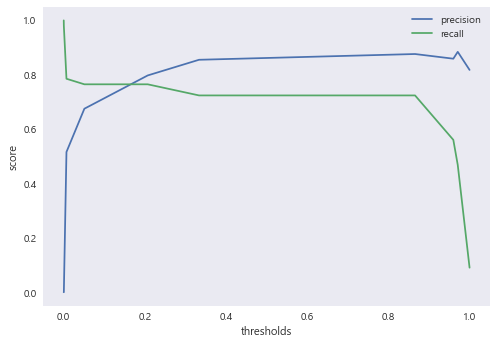

11 11 11


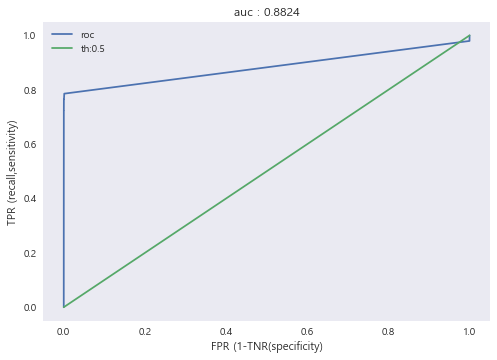

In [22]:
#cross_val_score +  param_grid(튜닝) / refit=True(best모델반영)
# depth가 깊어질수록 결정트리는 과적합되기 쉬워 예측 성능이 저하될 수 있다
# min_samples_split 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
myparam = {'max_depth':[1,3,5], 'min_samples_split':[1,2,3]}
GCV_model = GridSearchCV(DecisionTreeClassifier(random_state=36), param_grid=myparam, refit=True, cv=10, scoring='f1_macro',verbose=0)
GCV_model.fit(x_train, y_train)

#{'max_depth': 5, 'min_samples_split': 2}
print(GCV_model.best_score_)
print(GCV_model.best_estimator_)
print(GCV_model.best_params_)

pred = GCV_model.predict(x_test)  
df_score = f1_score(y_test, pred, average='macro')
print("F1 : {:.6f}".format(df_score))


proba = GCV_model.predict_proba(x_test)
hist_g_dt = myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)
hist_g_dt.insert(0,'hist_g_dt')
#DT Grid Accuracy:0.999350  precision:0.876543, recall:0.724490, f1:0.793296, auc:0.882445

0.8575015068216976
LogisticRegression(C=1, random_state=36)
{'C': 1, 'penalty': 'l2'}
F1 : 0.816905
Accuracy:0.998806  precision:0.670455, recall:0.602041, f1:0.634409, auc:0.876663
[[56835    29]
 [   39    59]]
56152 56152 56151


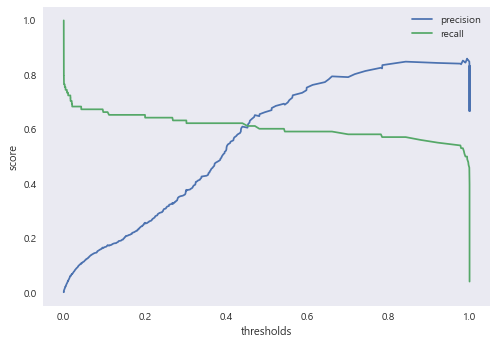

186 186 186


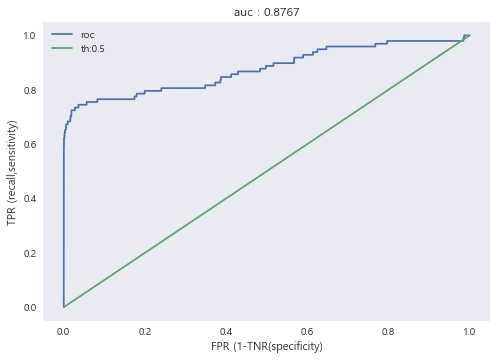

In [23]:
lr = LogisticRegression(random_state =36)
#cross_val_score +  param_grid(튜닝) / refit=True(best모델반영)
# depth가 깊어질수록 결정트리는 과적합되기 쉬워 예측 성능이 저하될 수 있다
# min_samples_split 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
myparam = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
GCV_model = GridSearchCV(lr, param_grid=myparam, refit=True, cv=10, scoring='f1_macro',verbose=0)
GCV_model.fit(x_train, y_train)

print(GCV_model.best_score_)
print(GCV_model.best_estimator_)
print(GCV_model.best_params_)

pred = GCV_model.predict(x_test)  
df_score = f1_score(y_test, pred, average='macro') 
print("F1 : {:.6f}".format(df_score))


proba = GCV_model.predict_proba(x_test)
hist_g_lr = myscore(y_test, pred, proba, pr_curve=1, auc_curve=1)
hist_g_lr.insert(0,'hist_g_lr')
#Grid lr Accuracy:0.998806  precision:0.670455, recall:0.602041, f1:0.634409, auc:0.876663

Accuracy:0.998806  precision:0.670455, recall:0.602041, f1:0.634409, auc:0.876663
[[56835    29]
 [   39    59]]
56152 56152 56151


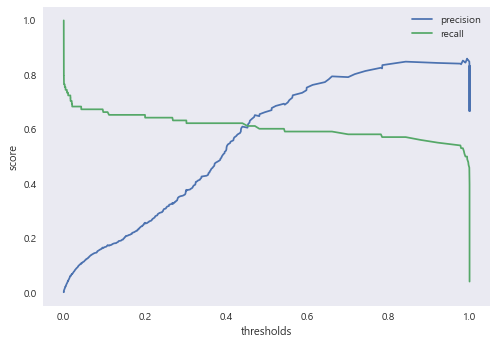

186 186 186


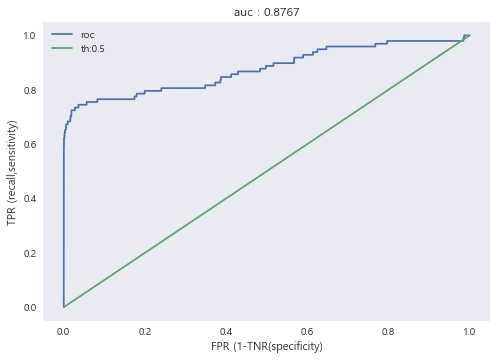

In [24]:
# 그리드 서치 없이
lr = LogisticRegression(random_state = 36)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_lr.insert(0,'hist_lr')

Accuracy:0.999175  precision:0.786517, recall:0.714286, f1:0.748663, auc:0.856976
[[56845    19]
 [   28    70]]
3 3 2


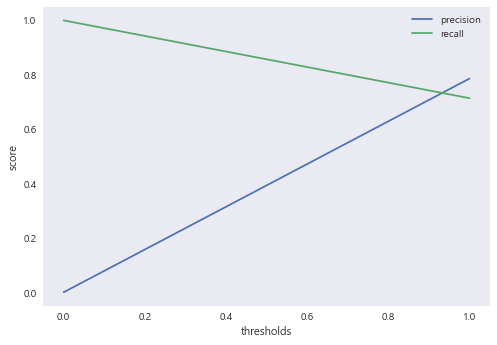

3 3 3


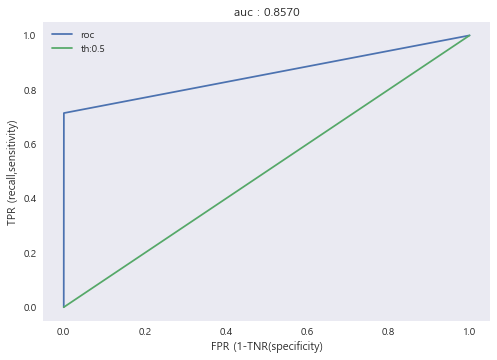

In [25]:
#그리드 서치 없이
dt = DecisionTreeClassifier(random_state = 36)
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
proba_dt = dt.predict_proba(x_test)
hist_dt = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_dt.insert(0,'hist_dt')

Accuracy:0.999421  precision:0.922078, recall:0.724490, f1:0.811429, auc:0.969686
[[56858     6]
 [   27    71]]
23346 23346 23345


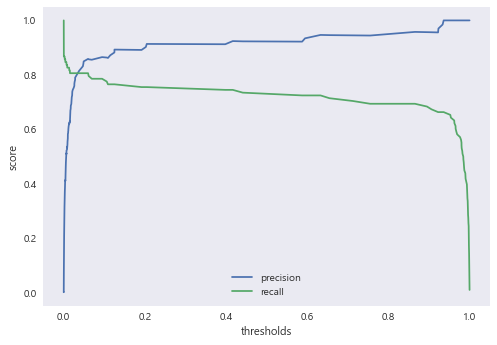

5653 5653 5653


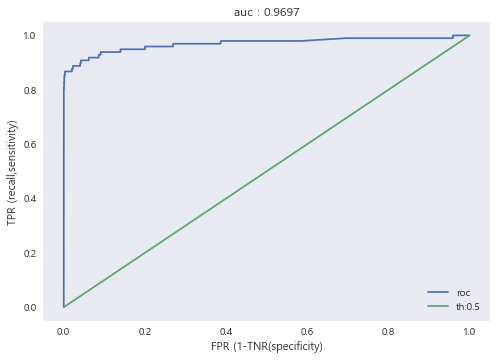

In [26]:
#lgbm
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_lb.insert(0,'hist_lb')
#Accuracy:0.999438  precision:0.923077, recall:0.734694, f1:0.818182ㅠ, auc:0.968107

In [27]:
print(hist_g_dt)
print(hist_g_lr)
print(hist_lr)
print(hist_dt)
print(hist_lb)

['hist_g_dt', [0.9993504441557529, 0.8765432098765432, 0.7244897959183674, 0.793296089385475, 0.882445440894422]]
['hist_g_lr', [0.9988062216916541, 0.6704545454545454, 0.6020408163265306, 0.6344086021505377, 0.8766629365589793]]
['hist_lr', [0.9988062216916541, 0.6704545454545454, 0.6020408163265306, 0.6344086021505377, 0.8766629365589793]]
['hist_dt', [0.9991748885221726, 0.7865168539325843, 0.7142857142857143, 0.7486631016042781, 0.8569757918642978]]
['hist_lb', [0.999420666409185, 0.922077922077922, 0.7244897959183674, 0.8114285714285714, 0.9696863551273068]]


# Log Amount

In [28]:
card_df = pd.read_csv('creditcard.csv')

In [29]:
log_am = np.log1p(card_df['Amount'])
card_df.insert(30, 'L_am', log_am)

In [30]:
card_df.drop(["Amount"], inplace=True, axis=1)

In [31]:
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

Accuracy:0.999263  precision:0.850000, recall:0.693878, f1:0.764045, auc:0.911698
[[56852    12]
 [   30    68]]
56230 56230 56229


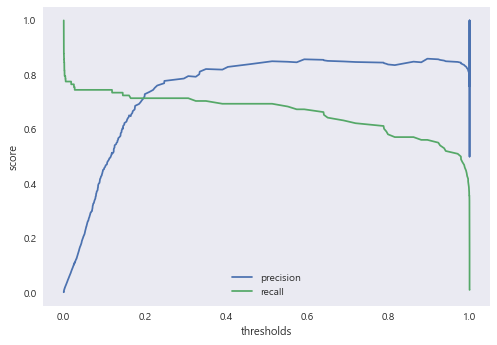

169 169 169


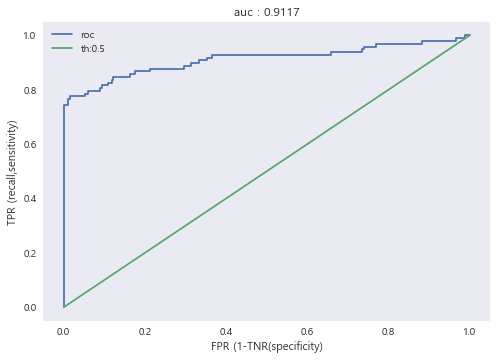

In [32]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_log_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_log_lr.insert(0,'hist_log_lr')
#Accuracy:0.999175  precision:0.814815, recall:0.673469, f1:0.737430, auc:0.920800

Accuracy:0.999421  precision:0.922078, recall:0.724490, f1:0.811429, auc:0.969686
[[56858     6]
 [   27    71]]
23346 23346 23345


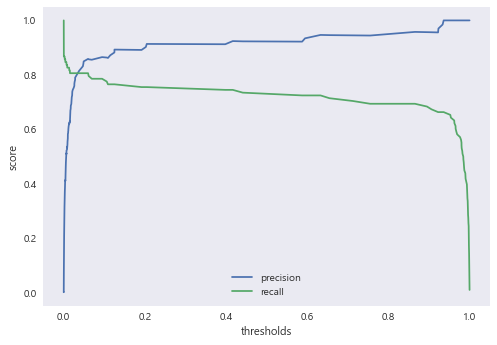

5653 5653 5653


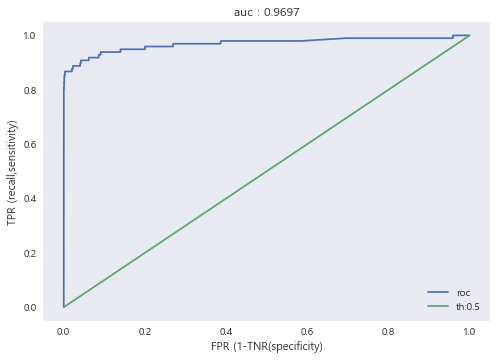

In [33]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_log_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_log_lb.insert(0,'hist_log_lb')

In [34]:
print(hist_lr)
print(hist_lb)
print(hist_log_lr)
print(hist_log_lb)

['hist_lr', [0.9988062216916541, 0.6704545454545454, 0.6020408163265306, 0.6344086021505377, 0.8766629365589793]]
['hist_lb', [0.999420666409185, 0.922077922077922, 0.7244897959183674, 0.8114285714285714, 0.9696863551273068]]
['hist_log_lr', [0.9992626663389628, 0.85, 0.6938775510204082, 0.7640449438202247, 0.9116980148840627]]
['hist_log_lb', [0.999420666409185, 0.922077922077922, 0.7244897959183674, 0.8114285714285714, 0.9696863551273068]]


# Time 제거

In [35]:
card_df = pd.read_csv('creditcard.csv')

In [36]:
card_df.drop(["Time"], inplace=True, axis=1)

In [37]:
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

Accuracy:0.999105  precision:0.861538, recall:0.571429, f1:0.687117, auc:0.951760
[[56855     9]
 [   42    56]]
54929 54929 54928


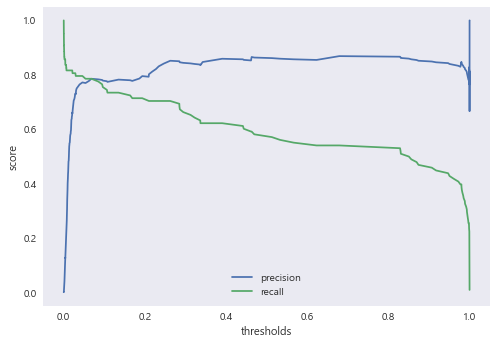

906 906 906


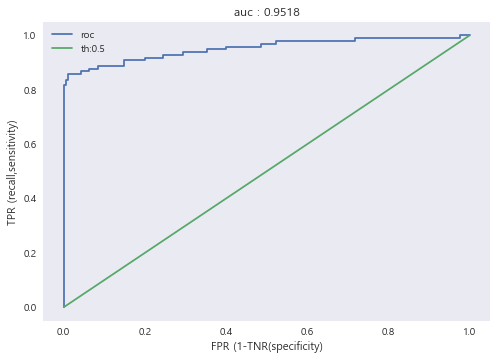

In [38]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_t_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_t_lr.insert(0,'hist_t_lr')
#Accuracy:0.999192  precision:0.861111, recall:0.632653, f1:0.729412, auc:0.966588

Accuracy:0.999473  precision:0.947368, recall:0.734694, f1:0.827586, auc:0.968201
[[56860     4]
 [   26    72]]
20309 20309 20308


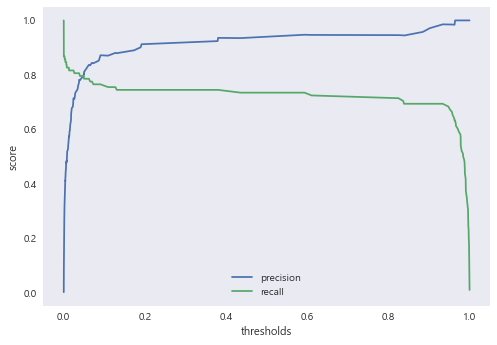

5082 5082 5082


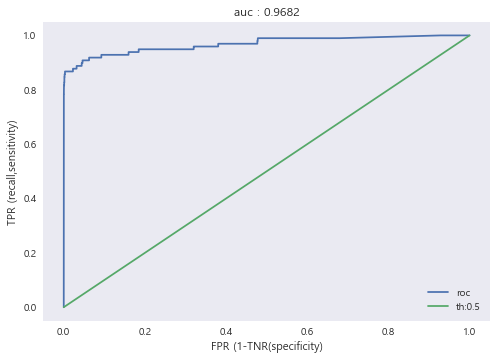

In [39]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_t_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_t_lb.insert(0,'hist_t_lb')

In [40]:
print(hist_lr)
print(hist_t_lr)
print(hist_lb)
print(hist_t_lb)

['hist_lr', [0.9988062216916541, 0.6704545454545454, 0.6020408163265306, 0.6344086021505377, 0.8766629365589793]]
['hist_t_lr', [0.9991046662687406, 0.8615384615384616, 0.5714285714285714, 0.6871165644171779, 0.9517604840191564]]
['hist_lb', [0.999420666409185, 0.922077922077922, 0.7244897959183674, 0.8114285714285714, 0.9696863551273068]]
['hist_t_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]


# Time 제거 Amount Log화

In [41]:
card_df = pd.read_csv('creditcard.csv')

In [42]:
log_am = np.log1p(card_df['Amount'])
card_df.insert(30, 'L_am', log_am)
card_df.drop(["Amount"], inplace=True, axis=1)
card_df.drop(['Time'], inplace=True,axis=1)

In [43]:
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

Accuracy:0.999192  precision:0.861111, recall:0.632653, f1:0.729412, auc:0.966588
[[56854    10]
 [   36    62]]
51723 51723 51722


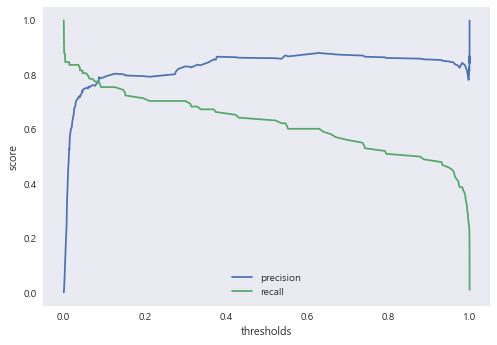

919 919 919


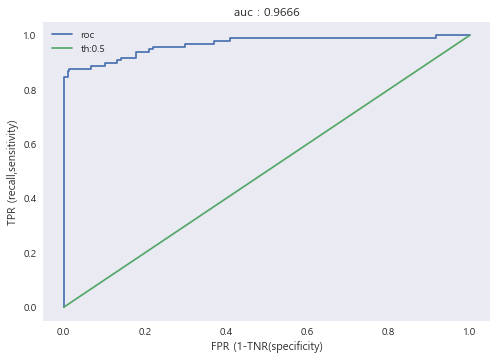

In [44]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_tlog_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_tlog_lr.insert(0,'hist_tlog_lr')
#Accuracy:0.999192  precision:0.861111, recall:0.632653, f1:0.729412, auc:0.966588

Accuracy:0.999473  precision:0.947368, recall:0.734694, f1:0.827586, auc:0.968201
[[56860     4]
 [   26    72]]
20309 20309 20308


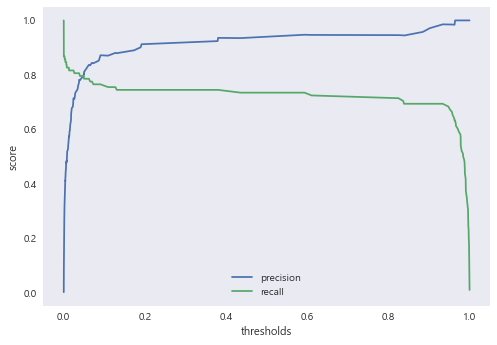

5082 5082 5082


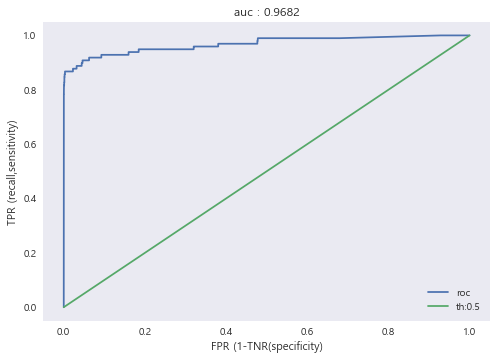

In [45]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_tlog_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_tlog_lb.insert(0,'hist_tlog_lb')

In [46]:
print(hist_t_lr)
print(hist_t_lb)
print(hist_tlog_lr)
print(hist_tlog_lb)

['hist_t_lr', [0.9991046662687406, 0.8615384615384616, 0.5714285714285714, 0.6871165644171779, 0.9517604840191564]]
['hist_t_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]
['hist_tlog_lr', [0.9991924440855307, 0.8611111111111112, 0.6326530612244898, 0.7294117647058823, 0.9665883798651705]]
['hist_tlog_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]


# T 제거 log화 이상치 제거

In [47]:
card_df = pd.read_csv('creditcard.csv')

In [48]:
card_df.drop(['Time'], inplace=True,axis=1)
card_df_columns = list(card_df.columns[:-1])

In [49]:
card_df = get_outlier(card_df,card_df_columns,0,2.0)

Int64Index([    18,    164,    290,   1158,   1632,   2178,   2464,   2682,
              2792,   2954,
            ...
            284479, 284516, 284517, 284536, 284561, 284631, 284649, 284772,
            284795, 284802],
           dtype='int64', length=4309)
Int64Index([    85,     89,    146,    174,    210,    225,    249,    401,
               450,    468,
            ...
            284426, 284434, 284447, 284448, 284476, 284496, 284497, 284528,
            284610, 284713],
           dtype='int64', length=5556)
Int64Index([  8464,  10036,  10644,  11374,  11738,  12975,  13034,  13115,
             13129,  13160,
            ...
            278901, 279411, 279629, 280949, 281787, 281789, 283149, 283315,
            283630, 284453],
           dtype='int64', length=252)
Int64Index([    83,    180,    351,    513,    608,    858,   2039,   2043,
              2170,   4018,
            ...
            284645, 284646, 284652, 284669, 284711, 284712, 284738, 284745,
            2

In [50]:
log_am = np.log1p(card_df['Amount'])
card_df.insert(29, 'L_am', log_am)
card_df.drop(["Amount"], inplace=True, axis=1)

In [51]:
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [52]:
display(x_data)
y_data.value_counts()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,L_am
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,1.541159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284796,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,-1.134176,0.677729,0.345928,0.002019,-0.679626,-0.549982,-0.199950,-0.420551,-0.283278,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,4.110874
284797,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,1.870263
284800,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,1.302913
284801,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,1.305626


0    167957
1       492
Name: Class, dtype: int64

Accuracy:0.999852  precision:1.000000, recall:0.948980, f1:0.973822, auc:0.992026
[[33592     0]
 [    5    93]]
21642 21642 21641


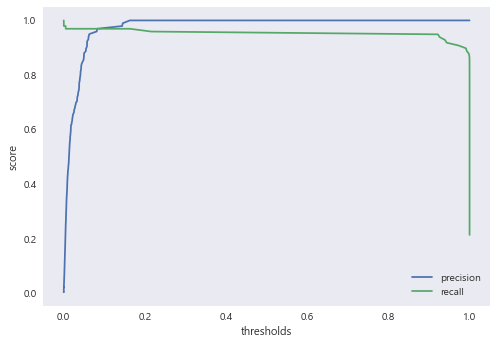

563 563 563


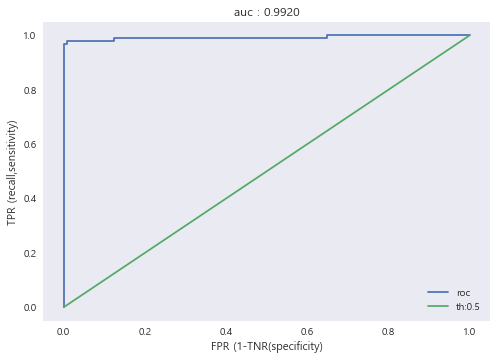

In [53]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_tlogs_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_tlogs_lr.insert(0,'hist_tlogs_lr')
#Accuracy:0.999192  precision:0.861111, recall:0.632653, f1:0.729412, auc:0.966588

Accuracy:0.999763  precision:1.000000, recall:0.918367, f1:0.957447, auc:0.993115
[[33592     0]
 [    8    90]]
8311 8311 8310


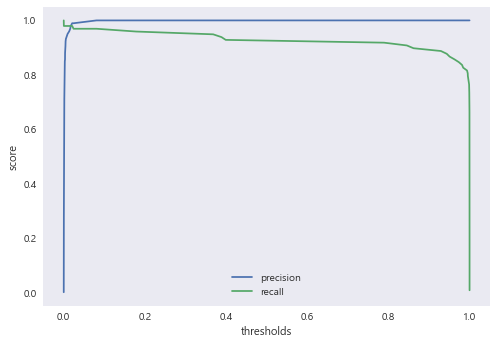

2070 2070 2070


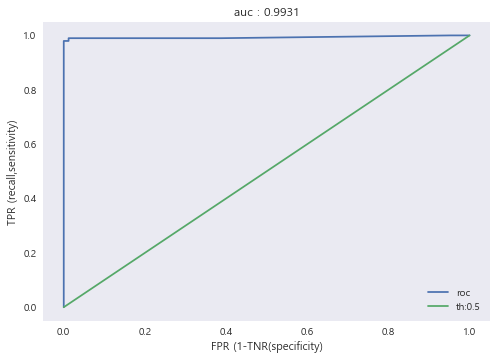

In [54]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_tlogs_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_tlogs_lb.insert(0,'hist_tlogs_lb')

In [55]:
print(hist_tlog_lr)
print(hist_tlog_lb)
print(hist_tlogs_lr)
print(hist_tlogs_lb)

['hist_tlog_lr', [0.9991924440855307, 0.8611111111111112, 0.6326530612244898, 0.7294117647058823, 0.9665883798651705]]
['hist_tlog_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]
['hist_tlogs_lr', [0.9998515880083111, 1.0, 0.9489795918367347, 0.9738219895287958, 0.9920255551613357]]
['hist_tlogs_lb', [0.9997625408132977, 1.0, 0.9183673469387755, 0.9574468085106383, 0.9931147053963286]]


# 0 과 1 모두 이상치 제거

In [56]:
card_df = pd.read_csv('creditcard.csv')

In [57]:
card_df.drop(['Time'], inplace=True,axis=1)
card_df_columns = list(card_df.columns[:-1])

In [58]:
card_df = get_outlier(card_df,card_df_columns,0,2.0)
card_df = get_outlier(card_df,card_df_columns,1,2.0)
card_df[card_df['Class']==1]['Class'].value_counts()

Int64Index([    18,    164,    290,   1158,   1632,   2178,   2464,   2682,
              2792,   2954,
            ...
            284479, 284516, 284517, 284536, 284561, 284631, 284649, 284772,
            284795, 284802],
           dtype='int64', length=4309)
Int64Index([    85,     89,    146,    174,    210,    225,    249,    401,
               450,    468,
            ...
            284426, 284434, 284447, 284448, 284476, 284496, 284497, 284528,
            284610, 284713],
           dtype='int64', length=5556)
Int64Index([  8464,  10036,  10644,  11374,  11738,  12975,  13034,  13115,
             13129,  13160,
            ...
            278901, 279411, 279629, 280949, 281787, 281789, 283149, 283315,
            283630, 284453],
           dtype='int64', length=252)
Int64Index([    83,    180,    351,    513,    608,    858,   2039,   2043,
              2170,   4018,
            ...
            284645, 284646, 284652, 284669, 284711, 284712, 284738, 284745,
            2

1    231
Name: Class, dtype: int64

In [59]:
log_am = np.log1p(card_df['Amount'])
card_df.insert(29, 'L_am', log_am)
card_df.drop(["Amount"], inplace=True, axis=1)

In [60]:
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

Accuracy:0.999792  precision:1.000000, recall:0.847826, f1:0.917647, auc:0.990397
[[33592     0]
 [    7    39]]
8480 8480 8479


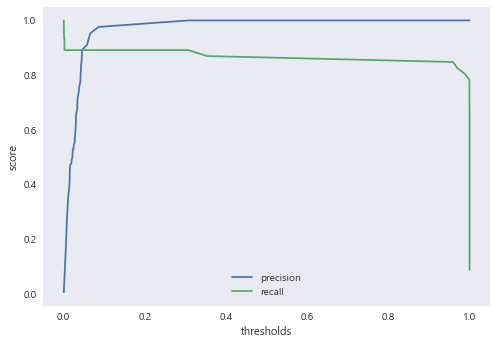

579 579 579


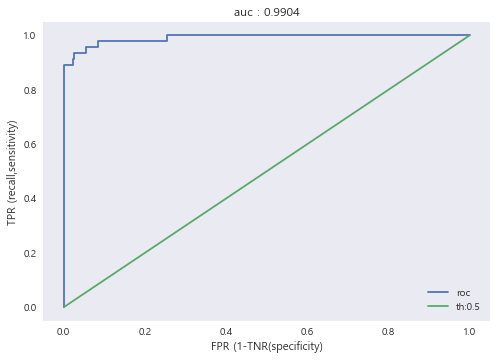

In [61]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
proba_lr = lr.predict_proba(x_test)
hist_tlogs1_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_tlogs1_lr.insert(0,'hist_tlogs1_lr')

Accuracy:0.999762  precision:1.000000, recall:0.826087, f1:0.904762, auc:0.977888
[[33592     0]
 [    8    38]]
4683 4683 4682


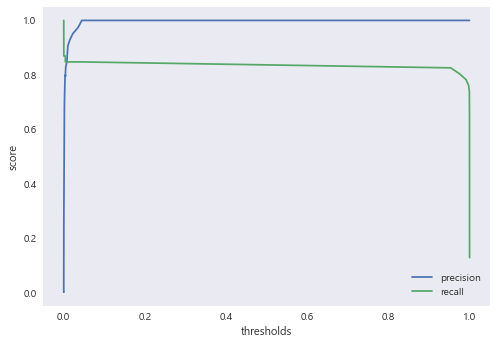

1920 1920 1920


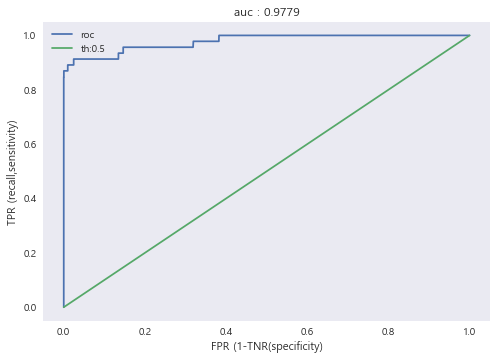

In [62]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_tlogs1_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_tlogs1_lb.insert(0,'hist_tlogs1_lb')

In [63]:
print(hist_tlog_lr)
print(hist_tlog_lb)
print(hist_tlogs_lr)
print(hist_tlogs_lb)
print(hist_tlogs1_lr)
print(hist_tlogs1_lb)

['hist_tlog_lr', [0.9991924440855307, 0.8611111111111112, 0.6326530612244898, 0.7294117647058823, 0.9665883798651705]]
['hist_tlog_lb', [0.9994733330992591, 0.9473684210526315, 0.7346938775510204, 0.8275862068965517, 0.9682005328861989]]
['hist_tlogs_lr', [0.9998515880083111, 1.0, 0.9489795918367347, 0.9738219895287958, 0.9920255551613357]]
['hist_tlogs_lb', [0.9997625408132977, 1.0, 0.9183673469387755, 0.9574468085106383, 0.9931147053963286]]
['hist_tlogs1_lr', [0.9997919020155777, 1.0, 0.8478260869565217, 0.9176470588235294, 0.9903969112728703]]
['hist_tlogs1_lb', [0.9997621737320888, 1.0, 0.8260869565217391, 0.9047619047619047, 0.977887786429481]]


# 언더샘플링

In [64]:
card_df = pd.read_csv('./creditcard.csv')

In [65]:
card_df.drop(["Time"], inplace=True, axis=1)
card_df = get_outlier(card_df,card_df_columns,0,2.0)
card_df[card_df['Class']==1]['Class'].value_counts()

Int64Index([    18,    164,    290,   1158,   1632,   2178,   2464,   2682,
              2792,   2954,
            ...
            284479, 284516, 284517, 284536, 284561, 284631, 284649, 284772,
            284795, 284802],
           dtype='int64', length=4309)
Int64Index([    85,     89,    146,    174,    210,    225,    249,    401,
               450,    468,
            ...
            284426, 284434, 284447, 284448, 284476, 284496, 284497, 284528,
            284610, 284713],
           dtype='int64', length=5556)
Int64Index([  8464,  10036,  10644,  11374,  11738,  12975,  13034,  13115,
             13129,  13160,
            ...
            278901, 279411, 279629, 280949, 281787, 281789, 283149, 283315,
            283630, 284453],
           dtype='int64', length=252)
Int64Index([    83,    180,    351,    513,    608,    858,   2039,   2043,
              2170,   4018,
            ...
            284645, 284646, 284652, 284669, 284711, 284712, 284738, 284745,
            2

1    492
Name: Class, dtype: int64

In [66]:
log_am = np.log1p(card_df['Amount'])
card_df.insert(29, 'L_am', log_am)
card_df.drop(["Amount"], inplace=True, axis=1)

In [67]:
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [68]:
from imblearn.under_sampling import NearMiss
x_train, y_train = NearMiss().fit_resample(x_train.values, y_train.values)
#x_test, y_test   = NearMiss().fit_resample(x_test.values, y_test.values)

In [69]:
# df = card_df.sample(frac=1)   #shuffle
# df1 = card_df.loc[card_df['Class'] == 1]
# df0 = card_df.loc[card_df['Class'] == 0][:len(df1)]
# under_df_f1f0 = pd.concat([df1, df0])
# under_df = under_df_f1f0.sample(frac=1, random_state=0)

Accuracy:0.688424  precision:0.009157, recall:0.989796, f1:0.018146, auc:0.973572
[[23096 10496]
 [    1    97]]
26196 26196 26195


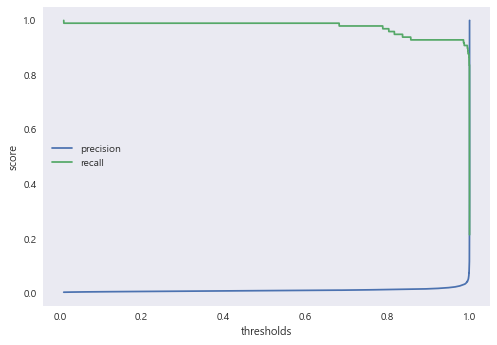

630 630 630


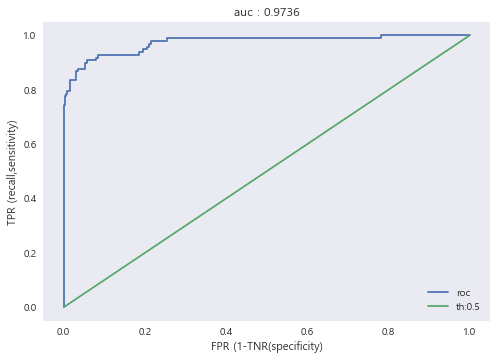

In [70]:
lr_clf = LogisticRegression(random_state = 0)
lr_clf.fit(x_train, y_train)
pred_lr = lr_clf.predict(x_test)
proba_lr = lr_clf.predict_proba(x_test)

hist_u_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_u_lr.insert(0,'hist_u_lr')
# Accuracy:0.821429  precision:1.000000, recall:0.642857, f1:0.782609, auc:0.884944

Accuracy:0.127308  precision:0.003322, recall:1.000000, f1:0.006622, auc:0.956764
[[ 4191 29401]
 [    0    98]]
27325 27325 27324


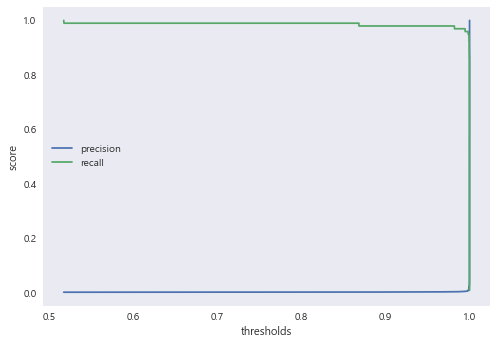

3204 3204 3204


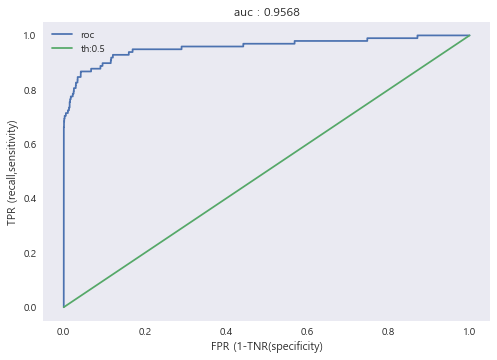

In [71]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train, y_train)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_u_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_u_lb.insert(0,'hist_u_lb')
#Accuracy:0.999438  precision:0.923077, recall:0.734694, f1:0.818182ㅠ, auc:0.968107

In [72]:
print('[정확도, 정밀도, 재현율, f1점수, auc]')
print(hist_tlogs_lr)
print(hist_tlogs_lb)
print(hist_u_lr)
print(hist_u_lb)

[정확도, 정밀도, 재현율, f1점수, auc]
['hist_tlogs_lr', [0.9998515880083111, 1.0, 0.9489795918367347, 0.9738219895287958, 0.9920255551613357]]
['hist_tlogs_lb', [0.9997625408132977, 1.0, 0.9183673469387755, 0.9574468085106383, 0.9931147053963286]]
['hist_u_lr', [0.6884238646482636, 0.009156990465401681, 0.9897959183673469, 0.018146104199794223, 0.9735715136256933]]
['hist_u_lb', [0.12730780647076284, 0.0033221465134411336, 1.0, 0.00662229279994594, 0.9567635758756944]]


# 오버 샘플링

In [73]:
card_df = pd.read_csv('./creditcard.csv')

In [74]:
card_df.drop(["Time"], inplace=True, axis=1)
card_df = get_outlier(card_df,card_df_columns,0,2.0)
card_df[card_df['Class']==1]['Class'].value_counts()

Int64Index([    18,    164,    290,   1158,   1632,   2178,   2464,   2682,
              2792,   2954,
            ...
            284479, 284516, 284517, 284536, 284561, 284631, 284649, 284772,
            284795, 284802],
           dtype='int64', length=4309)
Int64Index([    85,     89,    146,    174,    210,    225,    249,    401,
               450,    468,
            ...
            284426, 284434, 284447, 284448, 284476, 284496, 284497, 284528,
            284610, 284713],
           dtype='int64', length=5556)
Int64Index([  8464,  10036,  10644,  11374,  11738,  12975,  13034,  13115,
             13129,  13160,
            ...
            278901, 279411, 279629, 280949, 281787, 281789, 283149, 283315,
            283630, 284453],
           dtype='int64', length=252)
Int64Index([    83,    180,    351,    513,    608,    858,   2039,   2043,
              2170,   4018,
            ...
            284645, 284646, 284652, 284669, 284711, 284712, 284738, 284745,
            2

1    492
Name: Class, dtype: int64

In [75]:
log_am = np.log1p(card_df['Amount'])
card_df.insert(29, 'L_am', log_am)
card_df.drop(["Amount"], inplace=True, axis=1)

In [76]:
x_data = card_df.iloc[:,:-1]
y_data = card_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
x_train_o, y_train_o = smote.fit_resample(x_train, y_train)

Accuracy:0.981033  precision:0.129959, recall:0.969388, f1:0.229192, auc:0.991739
[[32956   636]
 [    3    95]]
17869 17869 17868


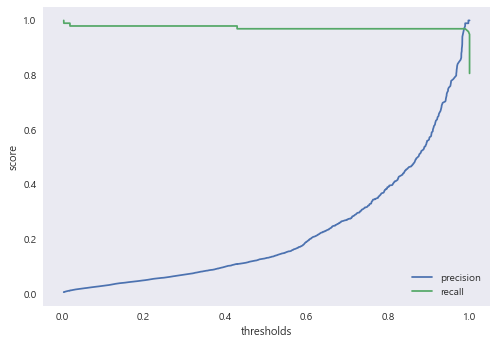

571 571 571


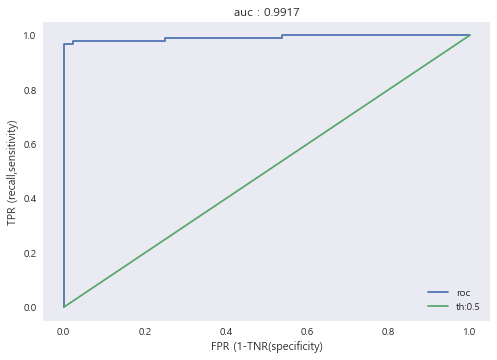

In [78]:
lr_clf = LogisticRegression(random_state = 36)
lr_clf.fit(x_train_o,y_train_o)
pred_lr = lr_clf.predict(x_test)
proba_lr = lr_clf.predict_proba(x_test)
hist_o_lr = myscore(y_test, pred_lr, proba_lr, pr_curve=1, auc_curve=1)
hist_o_lr.insert(0,'hist_o_lr')

Accuracy:0.999555  precision:0.880734, recall:0.979592, f1:0.927536, auc:0.991797
[[33579    13]
 [    2    96]]
25352 25352 25351


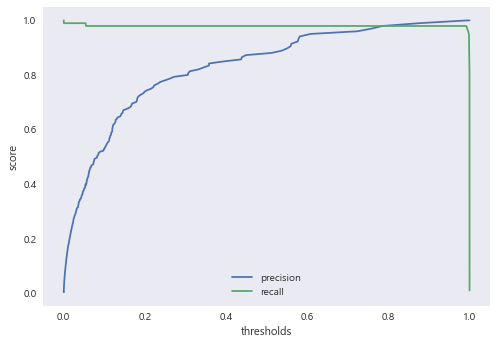

2647 2647 2647


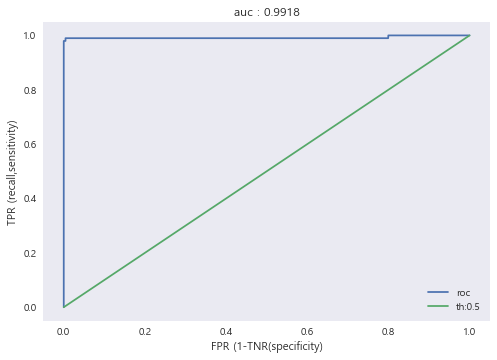

In [79]:
lgbm = LGBMClassifier(boost_from_average=False)
lgbm.fit(x_train_o, y_train_o)
pred_dt = lgbm.predict(x_test)
proba_dt = lgbm.predict_proba(x_test)
hist_o_lb = myscore(y_test, pred_dt, proba_dt, pr_curve=1, auc_curve=1)
hist_o_lb.insert(0,'hist_o_lb')
#Accuracy:0.999438  precision:0.923077, recall:0.734694, f1:0.818182ㅠ, auc:0.968107

In [80]:
print(hist_tlogs_lr)
print(hist_tlogs_lb)
print(hist_o_lr)
print(hist_o_lb)

['hist_tlogs_lr', [0.9998515880083111, 1.0, 0.9489795918367347, 0.9738219895287958, 0.9920255551613357]]
['hist_tlogs_lb', [0.9997625408132977, 1.0, 0.9183673469387755, 0.9574468085106383, 0.9931147053963286]]
['hist_o_lr', [0.981032947462155, 0.12995896032831739, 0.9693877551020408, 0.22919179734620024, 0.9917388007834713]]
['hist_o_lb', [0.9995547640249333, 0.8807339449541285, 0.9795918367346939, 0.927536231884058, 0.9917972755903981]]
